# Ridge Regression
## California Housing Price Prediction
## Introduction
This is an extension of a homework assignment for the __[Machine Learning For Absolute Beginners](https://mlearnfab.github.io/web/intro.html)__ class where linear regression is used to predict housing prices in California.

In this notebook Ridge Regression will be used to see if it performs better than non-regularized Linear Regression.

Regularization can reduce overfitting and it achieves this by pulling the coefficients towards 0. 
## Problem Statement
Build a model using ridge regression that will accurately predict California housing prices
## Input
The cleaned dataset from the ca_housing_data_cleaning.ipynb notebook
## Output
1. A ridge regression model that predicts the prices of houses using the California Housing Dataset
2. Metrics that describe the performance of the ridge regression model

MIT License

Copyright (c) 2022 UFO Software, LLC

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

## Read in the cleaned data

In [2]:
data_dir = 'data'
df = pd.read_csv(data_dir+'/calhousing_clean.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20417,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20418,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20419,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20420,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


## Use nested cross-validation to optimize the regularization parameter alpha
The larger the value of alpha the more the model is regularized.

### The training R2 score is the same as that achieved using linear regression but the testing score is higher than the training score and higher than the R2 score achieved using linear regression.

In [3]:
data = df.drop(columns = ['Price'])
target = df.Price

alphas = np.logspace(-2, 2, num=100)

ridge = make_pipeline(StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

cv = ShuffleSplit(n_splits=10, random_state=42)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="r2",
                            return_train_score=True,
                            return_estimator=True, n_jobs=8)

train_score = cv_results["train_score"]
print(f"Mean R2 of linear regression model on the train set:\n"
      f"{train_score.mean():.3f} ± {train_score.std():.3f}")

test_score = cv_results["test_score"]
print(f"Meean R2 of linear regression model on the test set:\n"
      f"{test_score.mean():.3f} ± {test_score.std():.3f}")

Mean R2 of linear regression model on the train set:
0.664 ± 0.001
Meean R2 of linear regression model on the test set:
0.670 ± 0.011


## Coefficients
The variability of the coefficients obtained using ridge regression is lower than the variability of the coefficients obtained using standard linear regression.

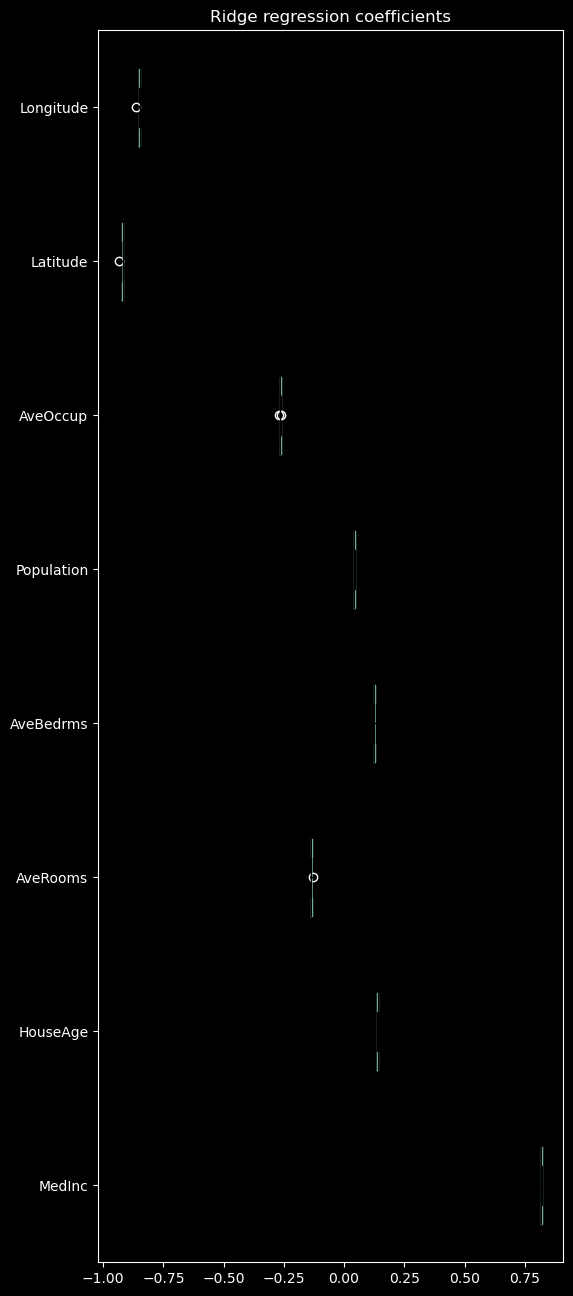

In [4]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge_regression = pd.DataFrame(coefs, columns=data.columns)

color = {"whiskers": "black", "medians": "black", "caps": "black"}

plt.style.use("dark_background");
weights_ridge_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge regression coefficients")

In [5]:
weights_ridge_regression

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.821143,0.137455,-0.137949,0.127713,0.041414,-0.261233,-0.917418,-0.843857
1,0.821752,0.138278,-0.142402,0.132037,0.040177,-0.263593,-0.917337,-0.846750
2,0.816653,0.136894,-0.134144,0.123555,0.044010,-0.263365,-0.924692,-0.850808
3,0.812709,0.139195,-0.134174,0.123613,0.041517,-0.265635,-0.920409,-0.849603
4,0.818415,0.140176,-0.138282,0.128401,0.042111,-0.263934,-0.919317,-0.847753
5,0.820536,0.142923,-0.140367,0.131469,0.044310,-0.262975,-0.916706,-0.846901
6,0.814849,0.140699,-0.131027,0.121558,0.045141,-0.264531,-0.932859,-0.862586
7,0.808524,0.140385,-0.127720,0.123657,0.040959,-0.264419,-0.926293,-0.852424
8,0.816269,0.136171,-0.136910,0.123901,0.041761,-0.268182,-0.918687,-0.847534
9,0.818859,0.137062,-0.137863,0.125418,0.042765,-0.264767,-0.918729,-0.845571


## Alpha
The optimal value of alpha is between 1.15 and 1.26

In [6]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[1.261856883066021,
 1.149756995397737,
 1.149756995397737,
 1.261856883066021,
 1.261856883066021,
 1.261856883066021,
 1.149756995397737,
 1.149756995397737,
 1.261856883066021,
 1.261856883066021]

In [7]:
print(f"Min optimal alpha: {np.min(best_alphas):.2f} and "
      f"Max optimal alpha: {np.max(best_alphas):.2f}")

Min optimal alpha: 1.15 and Max optimal alpha: 1.26
